In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
import time
width_quality=600
path_to_png_file	=	r"C:\Users\xlassix\Pictures\test4.jpg"# directory
i=Image.open(path_to_png_file)
dim=i.size[0]/width_quality
i = np.asarray(i.resize((width_quality,int(i.size[1]/dim)),Image.ANTIALIAS).convert("RGB"))

#	wherever	your	image	is 
import	matplotlib.image	as	mpimg 
img	=	mpimg.imread(path_to_png_file)
print("intial dimension:",img.shape)

#convert to gray
img_gray=np.mean(i,axis=2,dtype=np.uint)
print("gray image dimension:",i.shape)
plt.figure()
plt.imshow(i)
plt.show()

intial dimension: (433, 577, 3)
gray image dimension: (450, 600, 3)


<Figure size 640x480 with 1 Axes>

In [2]:

def conv_old(image,im_filter):
    m=time.time()
    #compute dimesions of image
    height,width=image.shape
    im_filter=np.array(im_filter)
    #output image size init with zero
    out_image=np.zeros((height-len(im_filter) +1,width-len(im_filter)+1))
    
    #calcuating the out_image
    for row in range(len(out_image)):
        for col in range(len(out_image[0])):
            #apply filter
            for i in range(len(im_filter)):
                for j in range(len(im_filter[0])):
                    out_image[row,col]+=image[row+i,col+j]*im_filter[i][j]
    #fix cumulative that exceed 255
    out_image[out_image>255]=255
    out_image[out_image<0]=0
    
    #plotting image
    plt.figure()
    plt.imshow(image,cmap=cm.gray_r)
    plt.show()
    
    #plotting out_image
    plt.figure()
    plt.imshow(out_image,cmap=cm.gray)
    plt.show()
    n=time.time()
    print("not optimized:",n-m)
    return out_image

In [3]:
def conv(image,im_filter):
    m=time.time()
    #compute dimesions of image
    height,width=image.shape
    im_filter=np.asarray(im_filter)
    #output image size init with zero
    out_image=np.zeros((height-len(im_filter) +1,width-len(im_filter)+1))
    x=len(im_filter)
    #calcuating the out_image
    for row in range(len(out_image)):
        for col in range(len(out_image[0])):
            out_image[row,col]=np.sum(image[row:row+x,col:col+x]*im_filter)
    #fix cumulative that exceed 255
    out_image[out_image>255]=255
    out_image[out_image<0]=0
    
    #plotting image
    plt.figure()
    plt.imshow(image,cmap=cm.gray_r)
    plt.show()
    
    #plotting out_image
    plt.figure()
    plt.imshow(out_image,cmap=cm.gray)
    plt.show()
    n=time.time()
    print("optimized:",n-m)
    return out_image

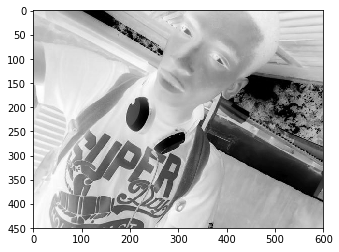

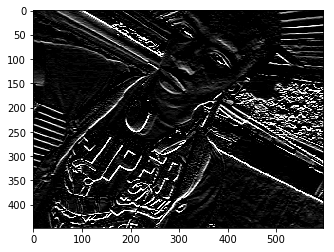

not optimized: 18.504379987716675


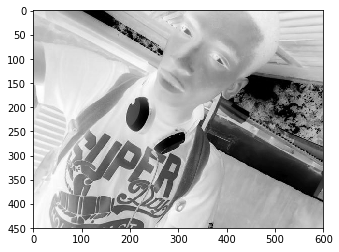

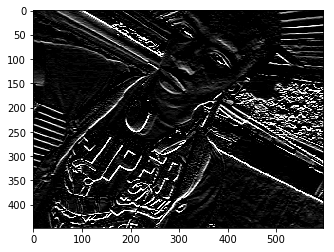

optimized: 4.406183958053589


array([[ 0.,  0.,  0., ..., 10., 10.,  5.],
       [ 0.,  0.,  2., ..., 10., 10.,  5.],
       [14., 19., 19., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  1.,  0., ..., 12., 14., 16.],
       [ 0.,  1.,  3., ...,  6.,  5.,  9.],
       [ 0.,  0.,  0., ..., 27., 13., 18.]])

In [4]:
edge_detection=([[4,2,4]
                ,[-1,0,1]
                ,[-4,-2,-4]])

conv_old(img_gray,edge_detection)
conv(img_gray,edge_detection)



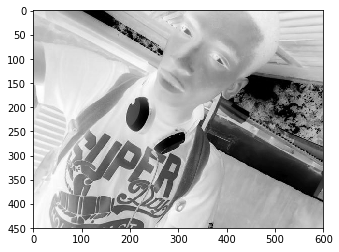

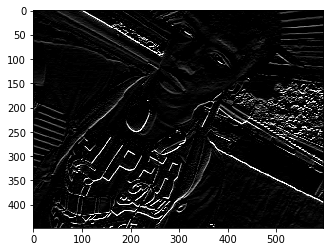

optimized: 4.811743259429932


array([[ 0. ,  0. ,  0. , ...,  4. ,  4. ,  3.2],
       [ 0.4,  1. ,  1.4, ...,  4. ,  4. ,  3.2],
       [ 9.2, 10. , 10.6, ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  6. ,  5. ,  4.6],
       [ 0. ,  0. ,  0. , ...,  3. ,  0.8,  1.8],
       [ 0. ,  0. ,  0. , ...,  7.8,  5.8,  6. ]])

In [5]:
edge_detection1=([[1,2,1]
                ,[0.2,0,-0.2]
                ,[-1,-2,-1]])

conv(img_gray,edge_detection1)


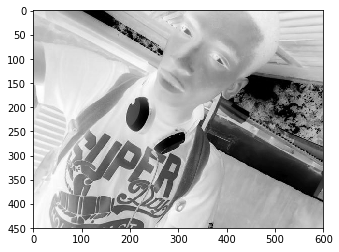

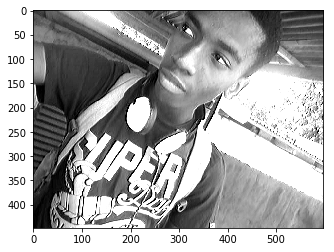

optimized: 4.8932883739471436


array([[ 84.,  78.,  66., ...,  31.,  31.,  33.],
       [ 89.,  81.,  69., ...,  30.,  30.,  31.],
       [ 90.,  82.,  69., ...,  29.,  29.,  31.],
       ...,
       [  1.,   0.,   0., ..., 111., 110., 108.],
       [  3.,   0.,   0., ..., 109., 107., 109.],
       [  3.,   0.,   0., ..., 106., 106., 109.]])

In [6]:
edge_detection=([[1,0,0]
                ,[2,0,-1]
                ,[1,0,-1]])

conv(img_gray,edge_detection)

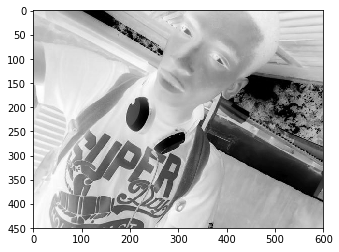

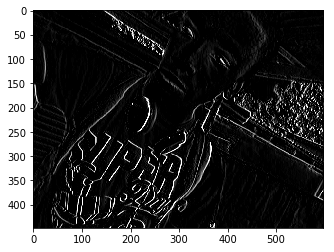

optimized: 4.764941215515137


In [7]:
edge_detection=([[1,0,-1]
                ,[2,0,-2]
                ,[1,0,-1]])

z=conv(img_gray,edge_detection)

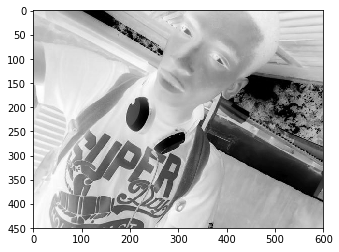

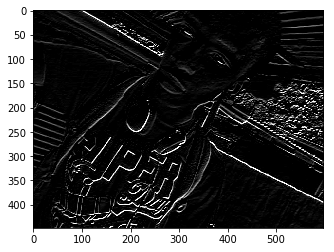

optimized: 4.932241201400757


In [8]:
edge_detection=([[1,2,1]
                ,[0,0,0]
                ,[-1,-1,-2]])

y=conv(img_gray,edge_detection)

In [9]:
ans=(y+z)
    

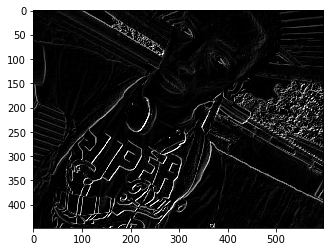

In [10]:
plt.figure()
plt.imshow(ans,cmap=cm.gray)
plt.show()